In [1]:
#SEUDOCODE

In [2]:
#loop over all poits
    #compute the distance beetween point p and every other points
#sort distance and return those k points that are nearest to point p

In [3]:
import numpy as np

In [9]:
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [10]:
p=np.array([2.5,2])

In [11]:
import matplotlib.pyplot as plt

[0.5, 3.5, 0.5, 3.5]

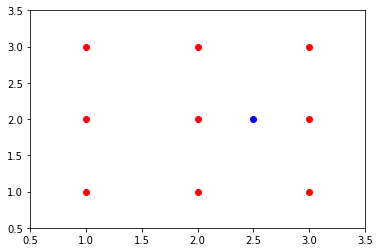

In [15]:
plt.plot(points[:,0],points[:,1],"ro")
plt.plot(p[0],p[1],"bo")
plt.axis([0.5,3.5,0.5,3.5])

In [17]:
def distance(p1,p2):
    """find the distance between p1 and p2"""
    return np.sqrt(np.sum(np.power(p2-p1,2)))

In [16]:
#calculando las distancias

In [20]:
p=np.array([2.5,2])
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
distances=np.zeros(points.shape[0])
for i in range(len(distances)):
    distances[i]=distance(p,points[i])

In [21]:
distances

array([1.80277564, 1.5       , 1.80277564, 1.11803399, 0.5       ,
       1.11803399, 1.11803399, 0.5       , 1.11803399])

In [22]:
#aparentemente los más cercanos deben ser [2,2] y [3,2], verifiquemos

In [25]:
points[4],distances[4]

(array([2, 2]), 0.5)

In [26]:
points[7],distances[7]

(array([3, 2]), 0.5)

In [28]:
#en numpy tenemos una opcion de ordenar valores de menor a mayor y devuelve una lista de los indices.
#argsort se llama la funcion

In [30]:
ind=np.argsort(distances)
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2], dtype=int64)

In [31]:
#entonces los que aparecen primero serían los vecios más cercanos

In [34]:
#si k=2
distances[ind[0:2]]

array([0.5, 0.5])

In [35]:
#lo llevamos a una funcion

In [51]:
from scipy.stats import mode as moda

def find_nearest_neighbors(p,points,k=5):
    """Find the k nearest neighbors of p and return their indices"""
    distances=np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances)
    return ind[:k]
    
    

In [52]:
p=np.array([2.5,2])
points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [53]:
find_nearest_neighbors(p,points,2)

array([4, 7], dtype=int64)

In [54]:
#3 vecinos cercanos
find_nearest_neighbors(p,points,3)

array([4, 7, 3], dtype=int64)

In [55]:
def majority_vote_short(votes):
    """Return the most common vote in the secuence"""
    mode,couts=moda(votes)
    return mode
    

In [76]:
## hacemos la prediccion

def knn_predict(p,points,outcomes,k=5):
    
    #encontramos sus vecinos más cercanos
    ind=find_nearest_neighbors(p,points,k)
    print("ind ",ind)
    print("outcomes ",outcomes[ind])
    #vemos que valor aparece más veces de estos indices en outcomes aparecen más veces
    return majority_vote_short(outcomes[ind])
    

In [77]:
#las clases de cada uno de los puntos "points"
outcomes=np.array([0,0,0,0,1,1,1,1,1])

In [78]:
knn_predict(np.array([1.0,2.7]),points,outcomes,k=2)

ind  [2 1]
outcomes  [0 0]


array([0])